In [ ]:
from google.colab import drive 
drive.mount('drive/', force_remount = True)

Mounted at drive/


In [ ]:
!mkdir data
!unzip /content/drive/MyDrive/Datasets/Combined_dataset.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/Combined dataset/Train/Non Mask/2301.png  
  inflating: data/Combined dataset/Train/Non Mask/2302.png  
  inflating: data/Combined dataset/Train/Non Mask/2303.png  
  inflating: data/Combined dataset/Train/Non Mask/2304.png  
  inflating: data/Combined dataset/Train/Non Mask/2305.png  
  inflating: data/Combined dataset/Train/Non Mask/2306.png  
  inflating: data/Combined dataset/Train/Non Mask/2307.png  
  inflating: data/Combined dataset/Train/Non Mask/2308.png  
  inflating: data/Combined dataset/Train/Non Mask/231.jpg  
  inflating: data/Combined dataset/Train/Non Mask/2310.png  
  inflating: data/Combined dataset/Train/Non Mask/2311.png  
  inflating: data/Combined dataset/Train/Non Mask/2312.png  
  inflating: data/Combined dataset/Train/Non Mask/2313.png  
  inflating: data/Combined dataset/Train/Non Mask/2314.png  
  inflating: data/Combined dataset/Train/Non Mask/2315.png  
  inflating: data/Combined dataset/

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

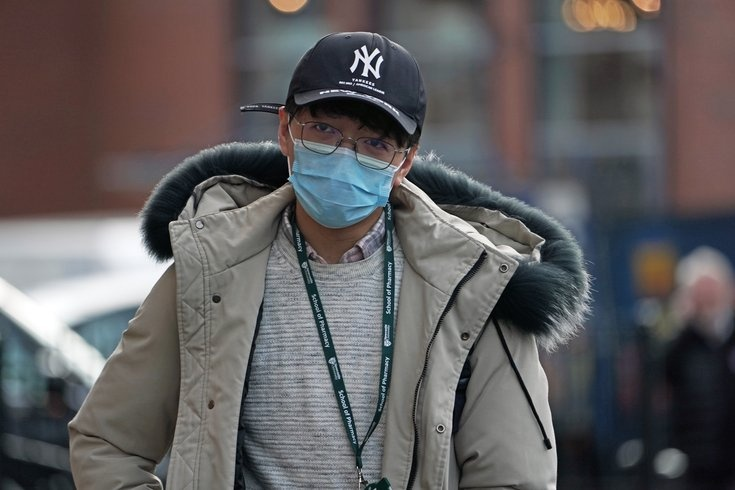

(490, 735, 3)

In [ ]:
img = cv2.imread('/content/data/Combined dataset/Train/Mask/0027.jpg')
cv2_imshow(img)
img.shape

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, AveragePooling2D
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import activations
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import cv2

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
image_data = ImageDataGenerator(rescale = 1./255,
                                      shear_range = 0.1,
                                      zoom_range = 0.2,
                                      rotation_range = 45,
                                      horizontal_flip = True,
                                      #validation_split = 0.2
                                )

In [ ]:
train_generator = image_data.flow_from_directory("/content/data/Combined dataset/Train",
                                                       target_size = (75, 75),
                                                       batch_size = 32,
                                                       class_mode = 'categorical'
                                                       #subset = 'training'
                                                 )
val_generator = image_data.flow_from_directory("/content/data/Combined dataset/Validation",
                                                    target_size = (75, 75),
                                                    batch_size = 32,
                                                    class_mode ='categorical'                                          
                                                    #subset = 'validation'
                                                )
test_generator = image_data.flow_from_directory("/content/data/Combined dataset/Test",
                                                       target_size = (75, 75),
                                                       batch_size = 32,
                                                       class_mode = 'categorical'
                                                       #subset = 'training'
                                                )

Found 10094 images belonging to 2 classes.
Found 1064 images belonging to 2 classes.
Found 1047 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
vggmodel =VGG16(weights='imagenet', include_top = False, input_shape = (75, 75, 3),pooling='max')

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
vggmodel.summary()

In [ ]:
len(vggmodel.layers)

20

In [ ]:
for layer in vggmodel.layers[0:15]:
  layer.trainable = False

In [ ]:
x = vggmodel.output
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='sigmoid')(x)

model = models.Model(inputs=vggmodel.input, outputs=x)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

#optimizer = tf.keras.optimizers.Adamax(lr=0.01)
optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001)


model.compile(loss='binary_crossentropy',
              optimizer = optimizer,
              metrics=['accuracy'])

earlystopper = EarlyStopping(patience=8, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=3, min_lr=1e-7, verbose=1)

In [ ]:
history = model.fit(train_generator,
                    validation_data = val_generator,
                    epochs = 50,
                    shuffle = True,
                    callbacks=[reduce_lr])

Epoch 1/50
316/316 [==============================] - 74s 130ms/step - loss: 0.1383 - accuracy: 0.9588 - val_loss: 0.1333 - val_accuracy: 0.9709
Epoch 2/50
316/316 [==============================] - 39s 124ms/step - loss: 0.0811 - accuracy: 0.9799 - val_loss: 0.0794 - val_accuracy: 0.9812
Epoch 3/50
316/316 [==============================] - 40s 126ms/step - loss: 0.0733 - accuracy: 0.9831 - val_loss: 0.1514 - val_accuracy: 0.9408
Epoch 4/50
316/316 [==============================] - 39s 125ms/step - loss: 0.0687 - accuracy: 0.9838 - val_loss: 0.0550 - val_accuracy: 0.9840
Epoch 5/50
316/316 [==============================] - 39s 124ms/step - loss: 0.0532 - accuracy: 0.9887 - val_loss: 0.0325 - val_accuracy: 0.9878
Epoch 6/50
316/316 [==============================] - 39s 125ms/step - loss: 0.0415 - accuracy: 0.9896 - val_loss: 0.0735 - val_accuracy: 0.9737
Epoch 7/50
316/316 [==============================] - 39s 124ms/step - loss: 0.0486 - accuracy: 0.9863 - val_loss: 0.0474 - val_ac

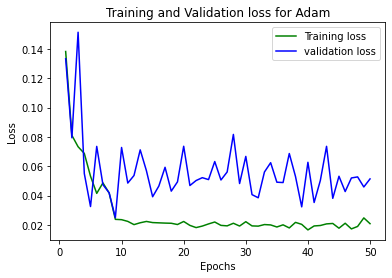

In [ ]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss for Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

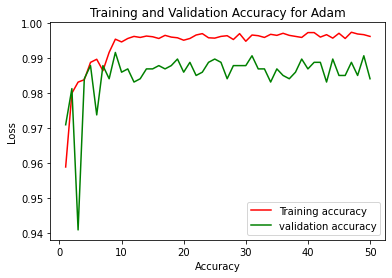

In [ ]:
import matplotlib.pyplot as plt
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,51)
plt.plot(epochs, acc_train, 'r', label='Training accuracy')
plt.plot(epochs, acc_val, 'g', label='validation accuracy')
plt.title('Training and Validation Accuracy for Adam')
plt.xlabel('Accuracy')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.save('/content/model.h5')

In [ ]:
from keras.models import load_model

In [ ]:
test_model = load_model('model.h5')

In [ ]:
import os

In [ ]:
predicted_output = []
img_true_label = []
image_true_label = []

In [ ]:
cc = '/content/data/Combined dataset/Test/Mask'
c = cc.split("/")
print(c)

['', 'content', 'data', 'Combined dataset', 'Test', 'Mask']


In [ ]:
imgg = cv2.imread('/content/data/Combined dataset/Test/Mask/1404.png')
ii_img = cv2.resize(imgg, (75, 75))
arrr = np.array(ii_img)
yy = np.expand_dims(arrr, axis=0)

In [ ]:
test_model.predict(yy)

array([[1., 0.]], dtype=float32)

In [ ]:
for (root,dirs,files) in os.walk('/content/data/Combined dataset/Test', topdown=True):
  if(files != []):
    for f in files:
      add = os.path.join(root, f)
      try:
        img = cv2.imread(add)
        i_img = cv2.resize(img, (75, 75))
        arr = np.array(i_img)
        y = np.expand_dims(arr, axis=0)
        result = test_model.predict(y)
        predicted_output.append(np.argmax(result))
      except:
        continue
      img_true_label.append(root.split('/')[-1])

In [ ]:
for i in img_true_label:
  if(i == 'Mask'):
    image_true_label.append(0)
  else:
    image_true_label.append(1)

In [ ]:
for i in range(0,len(predicted_output)):
  print(image_true_label[i],predicted_output[i])

1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1


In [ ]:
ttt = []
for k in image_true_label:
  ttt.append(int(k))
print(ttt)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ttt,predicted_output)

array([[466,  26],
       [  3, 552]])

In [ ]:
test_model.evaluate(test_generator)

33/33 [==============================] - 57s 2s/step - loss: 0.0094 - accuracy: 0.9952


[0.009379426017403603, 0.9952244758605957]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ttt, predicted_output
                            #, labels=['Mask','Non Mask']
                            ))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       492
           1       0.96      0.99      0.97       555

    accuracy                           0.97      1047
   macro avg       0.97      0.97      0.97      1047
weighted avg       0.97      0.97      0.97      1047

